In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns


C:\Users\panka\AppData\Local\Temp\ipykernel_21964\2760016582.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

breast_cancer_df=load_breast_cancer()
x=pd.DataFrame(breast_cancer_df.data,columns=breast_cancer_df.feature_names)
x.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
columns_to_select = ["mean area", "mean compactness"]
x=x[columns_to_select]
x.head()

,mean area,mean compactness
0,1001.0,0.27760
1,1326.0,0.07864
2,1203.0,0.15990
3,386.1,0.28390
4,1297.0,0.13280


In [4]:
y=pd.Categorical.from_codes(breast_cancer_df.target,breast_cancer_df.target_names)
print(y)


['malignant', 'malignant', 'malignant', 'malignant', 'malignant', ..., 'malignant', 'malignant', 'malignant', 'malignant', 'benign']
Length: 569
Categories (2, object): ['malignant', 'benign']


In [5]:
y=pd.get_dummies(y,drop_first=True)
print(y)

     benign
0     False
1     False
2     False
3     False
4     False
..      ...
564   False
565   False
566   False
567   False
568    True

[569 rows x 1 columns]


C:\Users\panka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


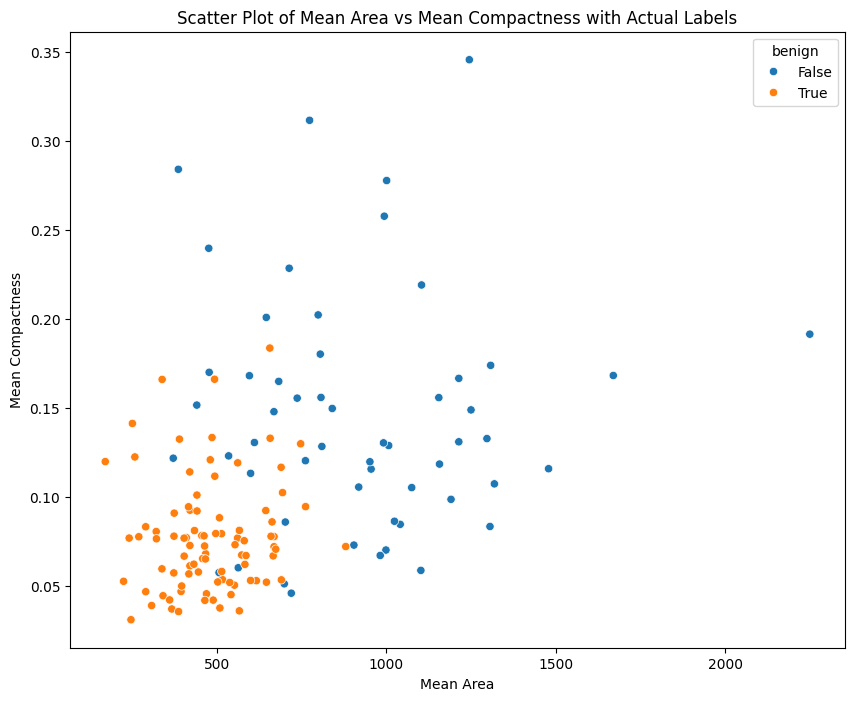

In [6]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=1)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, Y_train)

# Predict labels for the test data
y_pred = knn.predict(X_test)

# Create a DataFrame for visualization by concatenating X_test and Y_test
test_data = pd.concat([X_test, Y_test], axis=1)

# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mean area", y="mean compactness", hue="benign", data=test_data)
plt.title("Scatter Plot of Mean Area vs Mean Compactness with Actual Labels")
plt.xlabel("Mean Area")
plt.ylabel("Mean Compactness")
plt.show()


In [7]:
cf = confusion_matrix(Y_test.values.ravel(), y_pred.ravel())
print("Confusion matrix computed.")
print("Confusion matrix:")
print(cf)

Confusion matrix computed.
Confusion matrix:
[[42 13]
 [ 9 79]]


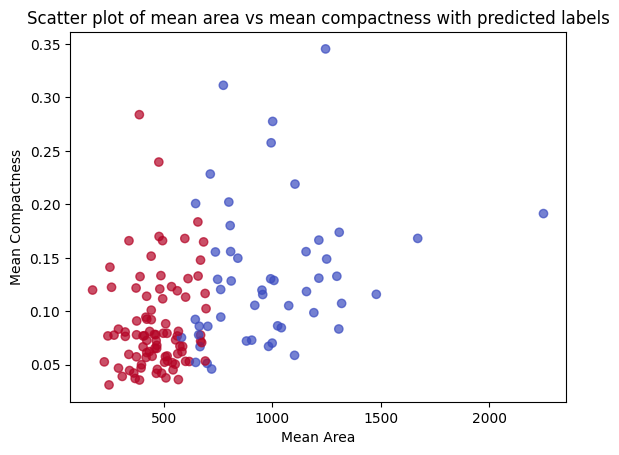

Scatter plot displayed.


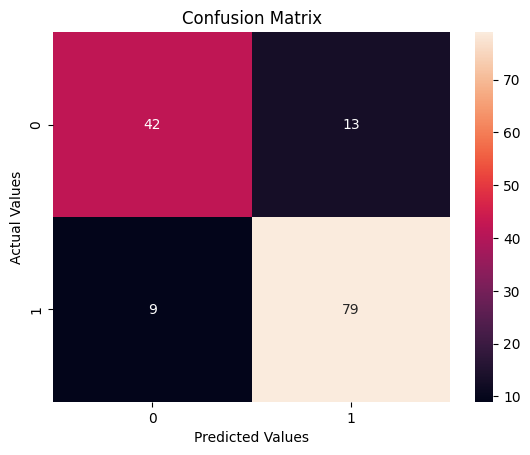

Confusion matrix heatmap displayed.


In [8]:
plt.scatter(X_test["mean area"], X_test["mean compactness"], c=y_pred, cmap="coolwarm", alpha=0.7)
plt.xlabel("Mean Area")
plt.ylabel("Mean Compactness")
plt.title("Scatter plot of mean area vs mean compactness with predicted labels")
plt.show()
print("Scatter plot displayed.")

sns.heatmap(cf, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()
print("Confusion matrix heatmap displayed.")